In [30]:
import numpy as np
import pandas as pd
import visuals as vs
from sklearn.cross_validation import ShuffleSplit
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


In [31]:

# TODO: Minimum price of the data
minimum_price = np.amin(prices)

# TODO: Maximum price of the data
maximum_price = np.amax(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


<b>Question 1 - Feature Observation</b>
As a reminder, we are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):

'RM' is the average number of rooms among homes in the neighborhood.
'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an increase in the value of 'MEDV' or a decrease in the value of 'MEDV'? Justify your answer for each.

<b>Answer 1:</b> An increase in the value of 'RM' would lead to an increase in the value of 'MEDV'. Bigger houses are generally more expensive than smaller ones. Sometimes the size metric is square footage of floor space, but the number of rooms is also an appopropriate metric and is probably highly correlated to surface area of floor space.

An increase in the value of 'LSTAT' would lead to a decrease in the value of 'MEDV'. Houses in poorer neighborhoods are generally worth less than houses in wealthier neighborhoods. One metric to measure the wealth or poverty of neighborhood is the fraction of the neighborhood population who are lower class workers. Once again there are other possible metrics, like total household income, but they likely correlate positvely with LSTAT.

An increase in 'PTRATIO' would lead to a decrease in the value of 'MEDV'. High quality neighborhood schools are generally considered to make a neighborhood more desribable to live. The quality of a school is often measured by class size, which should be the same as ratio of students to teachers, assuming one teacher per class

In [32]:
from sklearn.metrics import r2_score 

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    #Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [33]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


<b>Question 2 - Goodness of Fit</b>
Assume that a dataset contains five data points and a model made the following predictions for the target variable:
True Value	Prediction
    3.0	       2.5
   -0.5	       0.0
    2.0	       2.1
    7.0	       7.8
    4.2	       5.3
    
Run the code cell below to use the performance_metric function and calculate this model's coefficient of determination.

Would you consider this model to have successfully captured the variation of the target variable?
Why or why not?
Hint: The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
R2 score of 1 means the dependent variable can be predicted from the independent variable.
R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An
R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

<b>Answer 2:<b/> Yes, the high value R^2 = 0.923 means that 92.3 of the variation of the target variable is predicted by the model, a high value.

In [34]:
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state=42)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


<b>Question 3 - Training and Testing</b>

What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?
Hint: Think about how overfitting or underfitting is contingent upon how splits on data is done.


<b>Answer 3:</b> Broadly speaking, many data sets can be broken down into a deterministic part, modeled by a relatively simple mathematical function, and a random part, which should be modeled probabalistically because it is expected to change in any realization of the model. 

When first analyzing a dataset there is no way to determine whether the variation between two points is due to the deterministic and a random part. Breaking data into testing and training sets is a way of ensuring that the model is not built on any specific realization of the random part. 

Overfitting occurs when the computer tries to draw line through every single point, and thus creates a complicated equation such as a high order polynomial. Since this complicated equation is built on the specific random contribution to these points, the line will not longer perfectly fit as more points are added. Using training and testing sets allows a model built on some of the points, and then tested on others. The deterministic part of the variation is expected to be the same for both sets, but not the random part. Thus, an overfit is detected by a trivially high training set R^2 value, and a lower testing R^2 value.

Underfitting occurs when the curve to be drawn through the points is limited to some simple function. This may not even be able to capture the variation due to the deterministic part. In an underfit, both the R^2 values of the testing and training sets are expected to be small and similar to each other because the random part produces small changes between the datasets, but the larger part of the variation in the deterministic part already cannot be captured by the chosen curve.

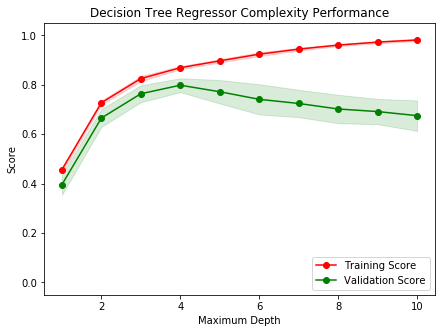

In [35]:
vs.ModelComplexity(features,prices)

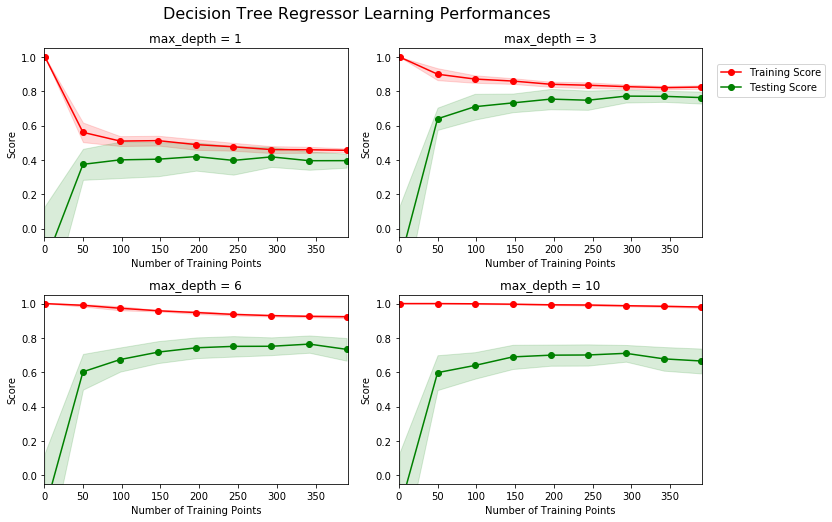

In [36]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

<b>Question 5 - Bias-Variance Tradeoff</b>

When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance?
How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?
Hint: High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

<b>Answer 5:</b> At a maximum depth of 1, the model suffers from high bias. The fact that both testing and training scores converge to the same low value means that something crucial is being missed that is the same in both sets- that is, the large, deterministic part of the function.

At a maximum depth of 10, the model suffers from high variance. The training set score has a high value, but the testing set remains low even as more points are added, meaning the model does not generalize well is likely being tailored specifically to the randomness of the training set.

<b>Question 6 - Best-Guess Optimal Model</b>
Which maximum depth do you think results in a model that best generalizes to unseen data?
What intuition lead you to this answer?

<b>Answer 6</b> A maximum depth of 4 likely results in the model best generalizes to unseen data. The intuition that leads to this answer is that for low values of max_depth, the testing and training scores converge to a low value, a sign of underfitting. For higher max_depths, the training score increases but the testing score decreases, a sign of overfitting. The nice result is that there is a local minimum in the testing score plot at max_depth = 4.

<b>Question 7</b> - Grid Search
What is the grid search technique?
How it can be applied to optimize a learning algorithm?


<b>Answer 7:</b> The grid search technique is a way of comparing all, of at least many different types of models. Since models often have multiple parameters, this information cannot be represeted on a single 2D plot of goodness of a model vs. parameter. Rather, parameter 1 must be held constant while parameter 2 is varried, this process repeated for different values of parameter one. For 2 parameters, you will have a grid of different models representing different pairs of parameters which can be measured by F1 score or some other metric.


<b>Question 8</b> - Cross-Validation
What is the k-fold cross-validation training technique?
What benefit does this technique provide for grid search when optimizing a model?

<b>Answer 8:</b> The k fold cross validation technique is a way of choosing different combinations of points to put in testing and training sets so that the model is not built on any specific, particular way of dividng these two sets.

'k' references to the number of times the procedure is repeated. A way of realizing the procedure is to divide all the data into 'k' sections so that for the kth procedure, k-1 of them to represent the training points and the remaining 1 set represent testing set.

In a grid comparison, one variable could be the order of polynomial of the curve, and another could be the k value.

In [59]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(max_depth)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': max_depth for max_depth in [(1,2,3,4,5,6,7,8,9,10)]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator = regressor,param_grid = params['max depth'],scoring = scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid= grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [60]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

NameError: global name 'max_depth' is not defined

<b>Question 9</b> - Optimal Model
What maximum depth does the optimal model have? How does this result compare to your guess in Question 6?
Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

Hint: The answer comes from the output of the code snipped above.
Answer:

In [61]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

NameError: name 'reg' is not defined

<b>Question 10 - Predicting Selling Prices </b>


Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:
Feature	Client 1	Client 2	Client 3
Total number of rooms in home	5 rooms	4 rooms	8 rooms
Neighborhood poverty level (as %)	17%	32%	3%
Student-teacher ratio of nearby schools	15-to-1	22-to-1	12-to-1
What price would you recommend each client sell his/her home at?
Do these prices seem reasonable given the values for the respective features?
Hint: Use the statistics you calculated in the Data Exploration section to help justify your response. Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.
Run the code block below to have your optimized model make predictions for each client's home.

In [62]:
vs.PredictTrials(features, prices, fit_model, client_data)

NameError: global name 'max_depth' is not defined

<b>Question 11 - Applicability</b>


In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.
Hint: Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
How relevant today is data that was collected from 1978? How important is inflation?
Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
Is the model robust enough to make consistent predictions?
Would data collected in an urban city like Boston be applicable in a rural city?
Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?
Answer: